***
***

<b><font size="5">Apprentice Chef: Identifying Halfway There Cross-Sell Success</font> </b>
    
<em>Machine Learning - Classification Model</em><br>

Carolina Duque Chopitea <br>
April 6, 2020 <br>
<br>
    
***
***

<b><font size="4">Company Background & Analysis Objective</font> </b>
<br>
<br>
Apprentice Chef, Inc. is a home-prep food delivery company, developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. In an effort to diversify their revenue stream, Apprentice Chef, Inc. has launched Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday (halfway through the work week). 
As such <b> the purpose of this study is to predict which customers will subscribe to <i>"Halfway There"</i></b>. 
<br>
Halfway There has been offer to all the customers in the dataset (Variable CROSS_SELL_SUCCESS). <br>
<b>The goal</b> is therefore <b>(1)</b> to analyze the sample data, <b>(2)</b> develop insights and <b> (3)</b> build and compare machine learning models to predict if a person will subscribe.<br>

 Some of the questions this study aims to answer include:
 - Is there a relationship between customers who sign up for Halfway There and the total meals they purchase or revenue?
 - Are those customers enrolled in weekly plans more likely to cross-sell? 
 - What are the common characteristics among subscribers? What features drive cross-sell success?



In [15]:
# Import Packages

import pandas as pd                                   # data science essentials
import numpy as np                                    # Numeric Python
import matplotlib.pyplot as plt                       # data viz
import seaborn as sns                                 # Enhance data viz   


import statsmodels.formula.api as smf                 # stats model for regression
from sklearn.model_selection import train_test_split  # Train Tests Split data 
from sklearn.neighbors import KNeighborsClassifier    # KNN for Classification
from sklearn.preprocessing import StandardScaler      # Standard scaler
from sklearn.linear_model import LogisticRegression   # Logistic Regression
from sklearn.metrics import roc_auc_score             # AUC curve
from sklearn.metrics import confusion_matrix          # Confusion Matrix
from sklearn.metrics import mean_squared_error        # MSE

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# Analysis 

##  <i> Exploratory Analysis </i>

 - About 68% of the customers in the sample dataset have taken advantage of Halfway There (cross sell-success)

In [16]:
# Load Data and general exploration of columns

file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

print(original_df.columns)

# original_df.head(100)

#original_df.describe().round(2)

# original_df.isnull().sum()


Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')


In [17]:
#original_df['CROSS_SELL_SUCCESS'].sum()
#1946-1321=625
#round(1321/1946,4)

## <i> Feature Treatment & Engineering </i>

In [18]:
# Calculating average price per meal

chef_data = original_df.copy()

# creating a column for avg price meal

chef_data['AVG_PRICE_MEAL'] = chef_data['REVENUE']/chef_data['TOTAL_MEALS_ORDERED'].round(2)

# chef_data['AVG_PRICE_MEAL'].quantile([0.10,
                                      #0.25,
                                      #0.50,
                                      #0.75,
                                      #0.90])
chef_data = pd.DataFrame(chef_data)

#chef_data.isnull().sum()

<b>Based on average price per meal creating a variable to that indicates if a person order beverages: </b>

From the average price per meal variable recently engineered, a variable to determined whether a customer has ordered beverages or not was created. The basic underpinning is that a customer who exceeds the average price per meal (maximum of $23) most likely had ordered some type of beverage. <br>
<br>
Those customers that normally ordered the lowest priced meals and add on only water wont make the cut, but those who have been ordering the most expensive wine make the cut and are therefore considered as customers that ordered beverages (from all the beverages ordered we are particularly interested in seeing if they ordered wine). <br>
<br>
The idea is to test if a person that is already ordering beverages is more likely to subscribe to Halfway There than those that do not. 
<br>
<br>
Please see the tables for meals and beverage prices: 
<br>
<br>

 

In [19]:
#chef_data['ORDERED_BEVERAGES'] = np.where(chef_data['AVG_PRICE_MEAL'] > 23, 1, 0)

In [20]:
# creating ordered beverage column
chef_data['ORDERED_BEVERAGES'] = 0

# looping to find Miss.
for index, val in chef_data.iterrows():
    
    if chef_data.loc[index, 'AVG_PRICE_MEAL'] > 23:
        chef_data.loc[index, 'ORDERED_BEVERAGES'] = 1
        
    elif chef_data.loc[index,'AVG_PRICE_MEAL'] <= 23:
        chef_data.loc[index, 'ORDERED_BEVERAGES'] = 0
    
    else:
        print('error')
        
chef_data.to_excel('Apprentice_Chef_featured.xlsx',
                 index = False)

# check if right:

# chef_data.loc[: , 'AVG_PRICE_MEAL':'ORDERED_BEVERAGES']

# chef_data['ORDERED_BEVERAGES'].sum() ----> we have aproximetly 1428 customers that ordered beverages

#### Missing Value Strategy
There are a total of 47 missing values in this dataset, all of which belong to 'family name' variable. Given the sample size of the dataset only 2.42%  of observations with missing values appears insignificant for any valuable imputation. As well the relationship between whether a customer provided their family name or not appears to be insignificant in determining if a person will subscrbe to Halfway there (correlation of only -0.015).
<br>


In [21]:
#chef_data =  pd.read_excel('Apprentice_Chef_featured.xlsx',index = False)

# Missing value strategy: weather they provided last name or not

#chef_data['PROVIDED_FAMILY_NAME'] = 1
#chef_data['PROVIDED_FAMILY_NAME'][chef_data['FAMILY_NAME'].isnull()] = 0

# check if rigth
        
# chef_data.loc[: , ['FAMILY_NAME','PROVIDED_FAMILY_NAME']]

# chef_data['PROVIDED_FAMILY_NAME'].sum() 

# 1946 - 1899


In [22]:
# the correlation between whether a person provided family name appears to have NO corralation with Cross Sell Suceess
# correlation of -0.015



#Subset for the condition of isnull() is true for the Family Name 
#Run descriptive stats for this group (mean, std, media, etc)

#c_corr = chef_data.corr()

#c_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

<b> Continuing with feature treatment and engineering </b>
<br>
<br>
Creating a column that determines the percentage of unique meals

In [23]:
#Creating a column for % of unique meals purchased
chef_data['PER_UNIQUE_MEALS']= round(chef_data['UNIQUE_MEALS_PURCH']/ chef_data['TOTAL_MEALS_ORDERED']*100, 2)

Based on percentages of unique meals, a 'willingness to try new products' was engineered.<br>
The logic for this featured is that if a customers' percentage of unique meals ordered exceeds 20% they are the more
likely to try new products. <br>
<b>The intention is to measure whether if a customer's willingness to try new products will contribute towards predicting their cross selling success.</b>

In [24]:
#Based on the previous column creating a "williness to try new things"

chef_data['WILLIGNESS_NEW_PRODUCTS'] = 0
chef_data['WILLIGNESS_NEW_PRODUCTS'][chef_data['PER_UNIQUE_MEALS'] >= 20]= 1


# 14 % of customers show willingness to try new products ----> round(267/1946, 2)
# print(chef_data['WILLIGNESS_NEW_PRODUCTS'].sum()) ------> 267 customers the most willing to try new things


chef_data.to_excel('Apprentice_Chef_featured.xlsx',
                 index = False)
#check if right

# chef_data.loc[: ,['PER_UNIQUE_MEALS', 'WILLIGNESS_NEW_PRODUCTS']]


C:\Users\Carolina Duque\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Creating a column based on whether a customer follows recommendations or not.<b> The idea is to understand the impact of following recommendations on a persons likeliness to be subscribe to Halfway There.<b>

In [25]:
# Follow recomendations appears to be significant. Create a column based on this 

chef_data = pd.read_excel('Apprentice_Chef_featured.xlsx')

chef_data['FOLLOWED_RECOMMENDATIONS'] = 0
chef_data['FOLLOWED_RECOMMENDATIONS'][chef_data['FOLLOWED_RECOMMENDATIONS_PCT'] > 30] = 1

chef_data.to_excel('Apprentice_Chef_featured.xlsx',index = False)
#chef if right

#chef_data['FOLLOWED_RECOMMENDATIONS'].sum()

# followed recommendations have been added

C:\Users\Carolina Duque\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Classifying emails
Three types of email domains have been identified: Professional, Personal, and Junk. <br>
Note that there are different email response rates based on a customer’s email domain group.

In [26]:
# read excel 
chef_data= pd.read_excel('Apprentice_Chef_featured.xlsx')

# Splitting personal emails (creating 5 new features)

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef_data.iterrows():
    
    # splitting email domain at '@'
    class_email = chef_data.loc[index,'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(class_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [27]:
#concatenating with original DataFrame
# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']

# creating domain email column
chef_data = pd.concat([chef_data, email_df['EMAIL_DOMAIN']],
                     axis = 1)


In [28]:
# 3 email domain class
PERSONAL_EMAIL= ['@gmail.com', '@yahoo.com', '@protonmail.com']
JUNK_EMAIL = ['@me.com', '@aol.com', '@hotmail.com', '@ive.com', '@msn.com', '@passport.com']

# created domain class

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef_data['EMAIL_DOMAIN']:
    
    if '@' + domain in PERSONAL_EMAIL:
        placeholder_lst.append('PERSONAL_@')
        

    elif '@' + domain in JUNK_EMAIL:
        placeholder_lst.append('JUNK_@')


    else:
        placeholder_lst.append('PROFESSIONAL_@')


# concatenating with original_2
chef_data['DOMAIN_CLASS'] = pd.Series(placeholder_lst)


# checking results
#chef_data['DOMAIN_CLASS'].value_counts()



In [29]:
# Creating variable 1/0 for emails
EMAIL_CLASS = pd.get_dummies(chef_data['DOMAIN_CLASS'])

# joining codings together
chef_data= chef_data.join([EMAIL_CLASS])


# saving new columns
email_dummies_columns = chef_data.columns



In [30]:
#email_sentiment = chef_data.loc[ : , ['MEDIAN_MEAL_RATING', 'DOMAIN_CLASS']].sort_values(by = 'MEDIAN_MEAL_RATING')

### Age : Over 21 aproximation
Based on email domain, the idea is create a featured that determines whether a person is over 21 or not.<br>
Even though not perfect, one can approximate the age of a person based on this. <br>
Based on the data we can observed that all the professional emails are from Forbs 500 companies. This can indicates that these customer already have a university degree and are probably over 21. <br>
Moreover, some other email domains like <i>protonmail</i> are secure and encrypted email services and have a monthly/annual fee <a href="https://protonmail.com/support/knowledge-base/business/">(source here)</a>. This probably means that this email belongs to older people who are tech savvy. People with domains like aol.com, yahoo.com, hotmail.com, and live.com, msn.com as well then to be older than 21 <a href="https://www.cnn.com/2010/TECH/web/11/16/email.users/index.html">(source here)</a>, <a href="https://www.statista.com/statistics/948016/blue-apron-customer-share-by-age-worldwide/">(source here)</a>
In addition, a consumer survey, shows that 83.5 percent of respondents aged 14 to 18 years stated that they used Gmail as their primary e-mail provider. while for Yahoo for example was only 6.9 percent. For this reason it was decided to include all gmail accounts as customers who are under 21. 

In [31]:
# Developing a strategy for getting age aprox from email
# chef_data['EMAIL_DOMAIN'].value_counts()



# the professional email registrated are rom forbe 500 companies, it is unlikly that these companies 
#hired people with no degrees, this means that these group of people are probably over 21



# Based on the previous column creating a "williness to try new things"

chef_data['OVER_21'] = 1
chef_data['OVER_21'][chef_data['EMAIL_DOMAIN'] == 'gmail.com' ] = 0



C:\Users\Carolina Duque\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
chef_data.to_excel('Apprentice_Chef_featured.xlsx',index=False)

## Outlier Analysis

In [33]:
# Calling excel file

chef_data = pd.read_excel('Apprentice_Chef_featured.xlsx')

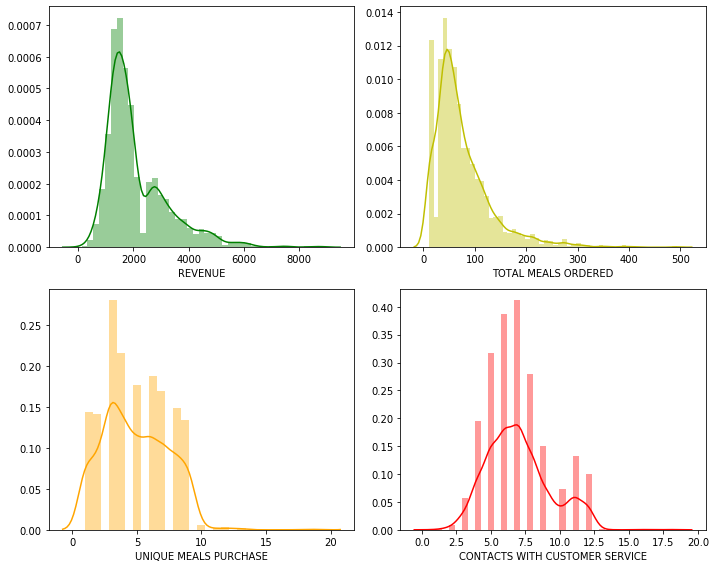

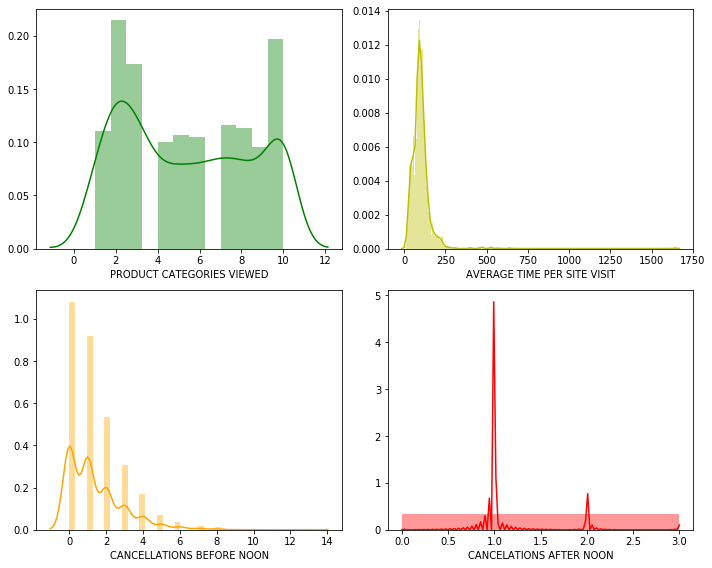

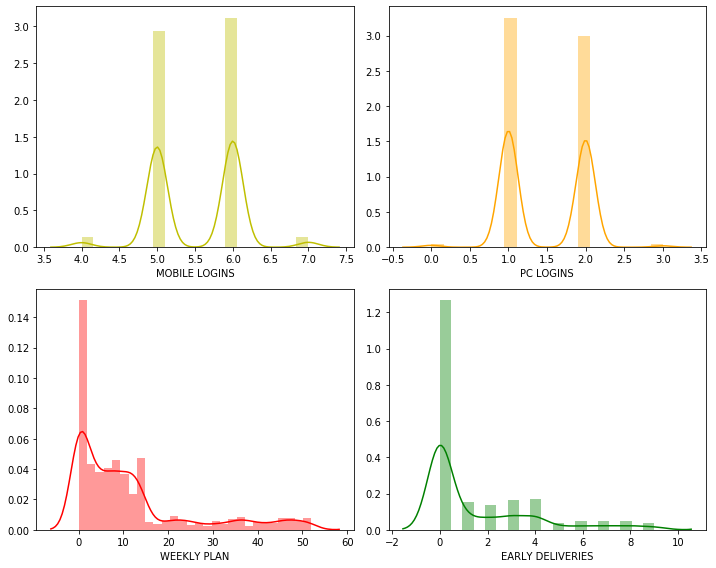

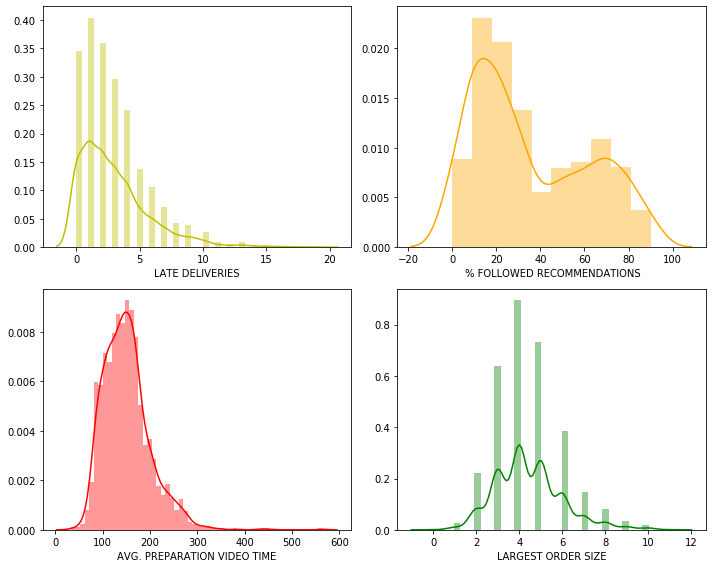

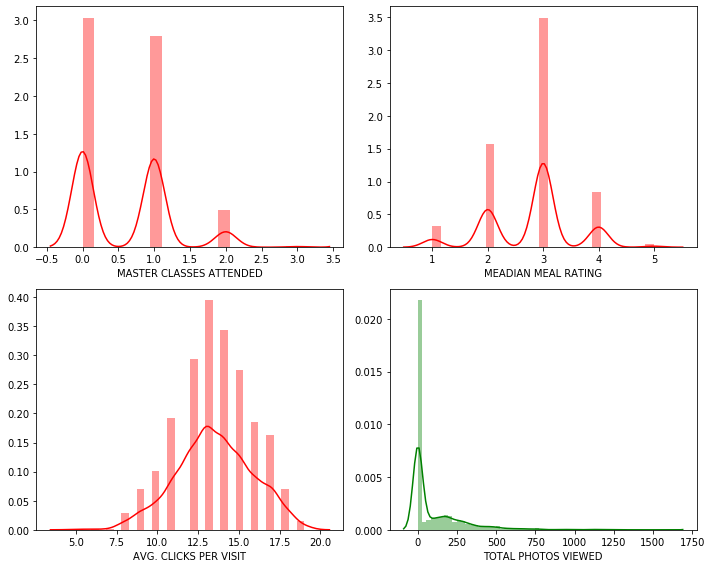

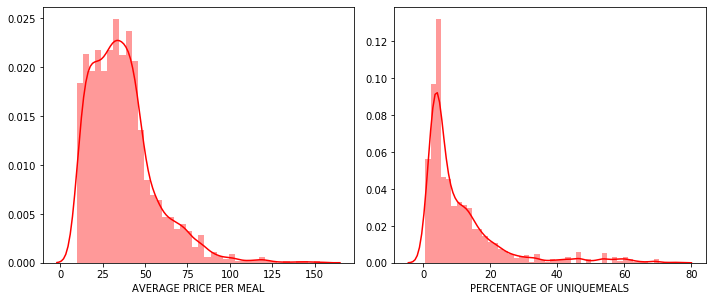

In [34]:
# <b><font size="3">Code to create plots for outliers</font> </b>

#creating plots


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('UNIQUE MEALS PURCHASE')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef_data['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('CONTACTS WITH CUSTOMER SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVERAGE TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'red')
plt.xlabel('CANCELATIONS AFTER NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['PC_LOGINS'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('WEEKLY PLAN')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('EARLY DELIVERIES')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('LATE DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins = 10,
             color = 'orange')
plt.xlabel(' % FOLLOWED RECOMMENDATIONS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['AVG_PREP_VID_TIME'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG. PREPARATION VIDEO TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST ORDER SIZE')

plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MEADIAN MEAL RATING')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef_data['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG. CLICKS PER VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef_data['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL PHOTOS VIEWED')


plt.tight_layout()
plt.show()


##############################
#############################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef_data['AVG_PRICE_MEAL'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVERAGE PRICE PER MEAL')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef_data['PER_UNIQUE_MEALS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PERCENTAGE OF UNIQUEMEALS')

plt.tight_layout()
plt.show()
########################



In [35]:
#setting outlier thresholds

REVENUE_hi = 5000 

TOTAL_MEALS_ORDERED_hi = 220   

UNIQUE_MEALS_PURCH_hi = 9   

CONTACTS_W_CUSTOMER_SERVICE_hi = 12
CONTACTS_W_CUSTOMER_SERVICE_lo = 2.5

AVG_TIME_PER_SITE_VISIT_hi = 200    

CANCELLATIONS_BEFORE_NOON_hi = 6

MOBILE_LOGINS_hi = 6
MOBILE_LOGINS_lo = 5

PC_LOGINS_hi = 2
PC_LOGINS_lo = 1

EARLY_DELIVERIES_hi = 4

LATE_DELIVERIES_hi = 10  

AVG_PREP_VID_TIME_hi = 300

LARGEST_ORDER_SIZE_hi = 8   
LARGEST_ORDER_SIZE_lo = 2

MASTER_CLASSES_ATTENDED_hi = 1
MASTER_CLASSES_ATTENDED_lo = 0

MEDIAN_MEAL_RATING_hi = 4
MEDIAN_MEAL_RATING_lo = 2

AVG_CLICKS_PER_VISIT_hi = 17.5
AVG_CLICKS_PER_VISIT_lo = 10

TOTAL_PHOTOS_VIEWED_hi = 350

AVG_PRICE_MEAL_hi = 75

PER_UNIQUE_MEALS_hi = 25

In [36]:
# renaming my data frame to reuse an old code

original_2 = chef_data.copy()


In [37]:
# developing features (columns) for outliers
#Explanatory variables 

original_2['OUT_REVENUE'] = 0
condition_hi_re = original_2.loc[0:,'OUT_REVENUE'][original_2['REVENUE'] > REVENUE_hi]

original_2['OUT_REVENUE'].replace(to_replace = condition_hi_re,
                                value      = 1,
                                inplace    = True)


#TOTAL_MEALS_ORDERED
original_2['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi_meals = original_2.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][original_2['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_2['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi_meals,
                                value      = 1,
                                inplace    = True)


#UNIQUE_MEALS_PURCH_
original_2['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi_unq = original_2.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][original_2['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_2['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi_unq,
                                value      = 1,
                                inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE high
original_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi_cs = original_2.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][original_2['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi_cs,
                                value      = 1,
                                inplace    = True)

condition_lo_cs = original_2.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][original_2['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_2['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo_cs,
                                 value      = 1,
                                 inplace    = True)

#AVG_TIME_PER_SITE_VISIT
original_2['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi_sv = original_2.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][original_2['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_2['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi_sv,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_BEFORE_NOON
original_2['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi_bnoon = original_2.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][original_2['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_2['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi_bnoon,
                                value      = 1,
                                inplace    = True)


# MOBILE_LOGINGS
original_2['OUT_MOBILE_LOGINS'] = 0
condition_hi_mlg = original_2.loc[0:,'OUT_MOBILE_LOGINS'][original_2['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo_mlg = original_2.loc[0:,'OUT_MOBILE_LOGINS'][original_2['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_2['OUT_MOBILE_LOGINS'].replace(to_replace = condition_hi_mlg,
                                 value      = 1,
                                 inplace    = True)

original_2['OUT_MOBILE_LOGINS'].replace(to_replace = condition_lo_mlg,
                                 value      = 1,
                                 inplace    = True)


# PC_lOGINS
original_2['OUT_PC_LOGINS'] = 0
condition_hi_pc = original_2.loc[0:,'OUT_PC_LOGINS'][original_2['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo_pc = original_2.loc[0:,'OUT_PC_LOGINS'][original_2['PC_LOGINS'] < PC_LOGINS_lo]

original_2['OUT_PC_LOGINS'].replace(to_replace = condition_hi_pc,
                                 value      = 1,
                                 inplace    = True)

original_2['OUT_PC_LOGINS'].replace(to_replace = condition_lo_pc,
                                 value      = 1,
                                 inplace    = True)


#EARLY_DELIVERIES
original_2['OUT_EARLY_DELIVERIES'] = 0
condition_hi_ed = original_2.loc[0:,'OUT_EARLY_DELIVERIES'][original_2['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_2['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi_ed,
                                value      = 1,
                                inplace    = True)


#LATE_DELIVERIES
original_2['OUT_LATE_DELIVERIES'] = 0
condition_hi_ld = original_2.loc[0:,'OUT_LATE_DELIVERIES'][original_2['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_2['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi_ld,
                                value      = 1,
                                inplace    = True)



#AVG_PREP_VID_TIME
original_2['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi_vid= original_2.loc[0:,'OUT_AVG_PREP_VID_TIME'][original_2['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_2['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi_vid,
                                value      = 1,
                                inplace    = True)


#LARGEST_ORDER_SIZE
original_2['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi_large= original_2.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_2['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

original_2['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi_large,
                                value      = 1,
                                inplace    = True)

condition_lo_large= original_2.loc[0:,'OUT_LARGEST_ORDER_SIZE'][original_2['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]
original_2['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo_large,
                                value      = 1,
                                inplace    = True)



#MASTER CLASS ATTENDED
original_2['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi_mas= original_2.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][original_2['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_2['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi_mas,
                                value      = 1,
                                inplace    = True)

condition_lo_mas= original_2.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][original_2['MASTER_CLASSES_ATTENDED'] < MASTER_CLASSES_ATTENDED_lo]

original_2['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_lo_mas,
                                value      = 1,
                                inplace    = True)


#MEDIAN_MEAL_RATING
original_2['OUT_MEDIAN_MEAL_RATING'] = 0
condition_hi_med= original_2.loc[0:,'OUT_MEDIAN_MEAL_RATING'][original_2['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_2['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi_med,
                                value      = 1,
                                inplace    = True)

condition_lo_med= original_2.loc[0:,'OUT_MEDIAN_MEAL_RATING'][original_2['MEDIAN_MEAL_RATING'] <MEDIAN_MEAL_RATING_lo]

original_2['OUT_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo_med,
                                value      = 1,
                                inplace    = True)

#AVG_CLICKS_PER_VISIT low/high
original_2['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi_cl = original_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][original_2['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo_cl = original_2.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][original_2['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_2['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi_cl,
                                 value      = 1,
                                 inplace    = True)

original_2['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo_cl,
                                 value      = 1,
                                 inplace    = True)


#TOTAL_PHOTOS_VIEWED
original_2['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi_ph= original_2.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][original_2['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_2['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi_ph,
                                value      = 1,
                                inplace    = True)


# AVG_PRICE_PER_MEAL

original_2['OUT_AVG_PRICE_MEAL'] = 0
condition_hi_mealp= original_2.loc[0:,'OUT_AVG_PRICE_MEAL'][original_2['AVG_PRICE_MEAL'] > AVG_PRICE_MEAL_hi]

original_2['OUT_AVG_PRICE_MEAL'].replace(to_replace = condition_hi_mealp,
                                value      = 1,
                                inplace    = True)




#PER_UNIQUE_MEAL

original_2['OUT_PER_UNIQUE_MEALS'] = 0
condition_hi_ump= original_2.loc[0:,'OUT_PER_UNIQUE_MEALS'][original_2['PER_UNIQUE_MEALS'] > PER_UNIQUE_MEALS_hi]

original_2['OUT_PER_UNIQUE_MEALS'].replace(to_replace = condition_hi_ump,
                                value      = 1,
                                inplace    = True)




In [38]:
# CHECKPOINT
original_2.to_excel('Apprentice_Chef_featured.xlsx', index= False)

In [39]:
chef_data = pd.read_excel('Apprentice_Chef_featured.xlsx')
#chef_data.isnull().sum()

## <i> Dropping Categorical/qualitative Variables </i>

In [40]:
# droping categorical features
chef_model = chef_data.drop(['NAME','EMAIL','FIRST_NAME','FAMILY_NAME', 'EMAIL_DOMAIN','DOMAIN_CLASS'], axis=1)

#checking
#chef_model['FOLLOWED_RECOMMENDATIONS']

                                      

In [41]:
chef_model.to_excel('Apprentice_Chef_final_featured.xlsx', index= False)


# Classification Modeling 

<b><font size="4">Correlations between variables and Cross Sell Success</font> </b>
<br>
<br>

<b><font size="4">Code and output</font> </b>
<br>
<br>

<b><font size="2">Code</font> </b>

chef_corr = chef_model.corr()

chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

<b><font size="2">Output</font> </b>


JUNK_@                             -0.256011<br>
OUT_CONTACTS_W_CUSTOMER_SERVICE   -0.058285<br>
CANCELLATIONS_AFTER_NOON          -0.054149<br>
PC_LOGINS                         -0.050647<br>
WILLIGNESS_NEW_PRODUCTS           -0.042373<br>
OUT_TOTAL_MEALS_ORDERED           -0.041327<br>
AVG_CLICKS_PER_VISIT              -0.035074<br>
OUT_MOBILE_LOGINS                 -0.030696<br>
PER_UNIQUE_MEALS                  -0.030352<br>
OUT_PER_UNIQUE_MEALS              -0.027599<br>
AVG_PRICE_MEAL                    -0.024558<br>
OVER_21                           -0.022204<br>
OUT_UNIQUE_MEALS_PURCH            -0.021241<br>
OUT_LARGEST_ORDER_SIZE            -0.020460<br>
OUT_PC_LOGINS                     -0.018550<br>
OUT_AVG_PRICE_MEAL                -0.016363<br>
PROVIDED_FAMILY_NAME              -0.015019<br>
OUT_AVG_CLICKS_PER_VISIT          -0.006905<br>
WEEKLY_PLAN                       -0.005337<br>
OUT_MEDIAN_MEAL_RATING            -0.004861<br>
UNIQUE_MEALS_PURCH                 0.001136<br>
OUT_MASTER_CLASSES_ATTENDED        0.004469<br>
REVENUE                            0.004540<br>
PRODUCT_CATEGORIES_VIEWED          0.004671<br>
OUT_REVENUE                        0.005180<br>
TOTAL_MEALS_ORDERED                0.006475<br>
LATE_DELIVERIES                    0.006695<br>
OUT_AVG_TIME_PER_SITE_VISIT        0.009166<br>
TOTAL_PHOTOS_VIEWED                0.010175<br>
AVG_TIME_PER_SITE_VISIT            0.011117<br>
ORDERED_BEVERAGES                  0.011537<br>
EARLY_DELIVERIES                   0.015112<br>
OUT_LATE_DELIVERIES                0.018558<br>
OUT_TOTAL_PHOTOS_VIEWED            0.019732<br>
OUT_EARLY_DELIVERIES               0.021205<br>
LARGEST_ORDER_SIZE                 0.022000<br>
OUT_AVG_PREP_VID_TIME              0.022872<br>
MEDIAN_MEAL_RATING                 0.031798<br>
AVG_PREP_VID_TIME                  0.032115<br>
CONTACTS_W_CUSTOMER_SERVICE        0.036541<br>
MASTER_CLASSES_ATTENDED            0.037213<br>
PERSONAL_@                         0.038841<br>
PACKAGE_LOCKER                     0.043534<br>
MOBILE_LOGINS                      0.044462<br>
OUT_CANCELLATIONS_BEFORE_NOON      0.061191<br>
REFRIGERATED_LOCKER                0.068321<br>
TASTES_AND_PREFERENCES             0.081438<br>
MOBILE_NUMBER                      0.102657<br>
PROFESSIONAL_@                     0.156736<br>
CANCELLATIONS_BEFORE_NOON          0.163442<br>
FOLLOWED_RECOMMENDATIONS_PCT       0.464387<br>
CROSS_SELL_SUCCESS                 1.000000<br>
Name: CROSS_SELL_SUCCESS, dtype: float64

No variables appears to have a high relationship with Cross Sell Success, however a <b>logistic regression </b> model can be build to observe which variables drive cross-selling and if they are statistically significant enough to be included in the final model. 

## Logistic Regression: base model

<b>Train Test Split Data</b>

In [42]:

chef_model = pd.read_excel('Apprentice_Chef_final_featured.xlsx')
# creating response and explanatory variables
# declaring explanatory variables
chef_x = chef_model.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_y = chef_model.loc[ : , 'CROSS_SELL_SUCCESS']


#chef_x.info()
#chef_x['FOLLOWED_RECOMMENDATIONS']

In [43]:
# Setting a seed 

seed = 222

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_x,
            chef_y,
            test_size = 0.25,
            random_state = seed,
            stratify = chef_y)


# merging training data for statsmodels
chef_train= pd.concat([X_train, y_train], axis = 1)

In [73]:
# looping to make x-variables suitable for statsmodels
#for val in chef_x:
    #print(f"chef_train['{val}'] +")

In [44]:
### Building my first model

# MODEL 1

logit_MRM = smf.logit(formula=""" CROSS_SELL_SUCCESS ~
chef_train['REVENUE'] +
chef_train['TOTAL_MEALS_ORDERED'] +
chef_train['UNIQUE_MEALS_PURCH'] +
chef_train['CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['PRODUCT_CATEGORIES_VIEWED'] +
chef_train['AVG_TIME_PER_SITE_VISIT'] +
chef_train['MOBILE_NUMBER'] +
chef_train['CANCELLATIONS_BEFORE_NOON'] +
chef_train['CANCELLATIONS_AFTER_NOON'] +
chef_train['TASTES_AND_PREFERENCES'] +
chef_train['MOBILE_LOGINS'] +
chef_train['PC_LOGINS'] +
chef_train['WEEKLY_PLAN'] +
chef_train['EARLY_DELIVERIES'] +
chef_train['LATE_DELIVERIES'] +
chef_train['PACKAGE_LOCKER'] +
chef_train['REFRIGERATED_LOCKER'] +
chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_train['AVG_PREP_VID_TIME'] +
chef_train['LARGEST_ORDER_SIZE'] +
chef_train['MASTER_CLASSES_ATTENDED'] +
chef_train['MEDIAN_MEAL_RATING'] +
chef_train['AVG_CLICKS_PER_VISIT'] +
chef_train['TOTAL_PHOTOS_VIEWED'] +
chef_train['AVG_PRICE_MEAL'] +
chef_train['ORDERED_BEVERAGES'] +
chef_train['PER_UNIQUE_MEALS'] +
chef_train['WILLIGNESS_NEW_PRODUCTS'] +
chef_train['JUNK_@'] +
chef_train['FOLLOWED_RECOMMENDATIONS']+
chef_train['OVER_21'] +
chef_train['OUT_REVENUE'] +
chef_train['OUT_TOTAL_MEALS_ORDERED'] +
chef_train['OUT_UNIQUE_MEALS_PURCH'] +
chef_train['OUT_CONTACTS_W_CUSTOMER_SERVICE'] +
chef_train['OUT_AVG_TIME_PER_SITE_VISIT'] +
chef_train['OUT_CANCELLATIONS_BEFORE_NOON'] +
chef_train['OUT_MOBILE_LOGINS'] +
chef_train['OUT_PC_LOGINS'] +
chef_train['OUT_EARLY_DELIVERIES'] +
chef_train['OUT_LATE_DELIVERIES'] +
chef_train['OUT_AVG_PREP_VID_TIME'] +
chef_train['OUT_LARGEST_ORDER_SIZE'] +
chef_train['OUT_MASTER_CLASSES_ATTENDED'] +
chef_train['OUT_MEDIAN_MEAL_RATING'] +
chef_train['OUT_AVG_CLICKS_PER_VISIT'] +
chef_train['OUT_TOTAL_PHOTOS_VIEWED'] +
chef_train['OUT_AVG_PRICE_MEAL'] +
chef_train['OUT_PER_UNIQUE_MEALS'] 
""", data= chef_train) 




#fit the model based on the data
results = logit_MRM.fit()



#summary output
print(results.summary())


         Current function value: 0.352520
         Iterations: 35


C:\Users\Carolina Duque\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1409
Method:                           MLE   Df Model:                           49
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.4386
Time:                        10:24:42   Log-Likelihood:                -514.33
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                3.916e-137
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        -0.0494      1.863     -0.027      0.979      -3.700       3.601
chef_train['REVENUE']     

***
***
After running the multiple logistical regression. Those variables that were not statistically significant were removed.<br>
A final model based on only those statistically significant variables was created. <br>
A p-value < 0.05 was used

In [45]:
# lOGISTIC REGRESSION MODEL 2
# Building model with relevant variables 

# building a model
logit_2 = smf.logit(formula=""" CROSS_SELL_SUCCESS ~
chef_train['UNIQUE_MEALS_PURCH'] +
chef_train['MOBILE_NUMBER'] +
chef_train['CANCELLATIONS_BEFORE_NOON'] +
chef_train['TASTES_AND_PREFERENCES'] +
chef_train['PC_LOGINS'] +
chef_train['FOLLOWED_RECOMMENDATIONS_PCT'] +
chef_train['PER_UNIQUE_MEALS'] +
chef_train['JUNK_@'] 
""", data= chef_train)



# fit the model based on the data
results_2 = logit_2.fit()



#  summary output
print(results_2.summary())


Optimization terminated successfully.
         Current function value: 0.446914
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.2883
Time:                        10:24:58   Log-Likelihood:                -652.05
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                5.959e-109
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   

<font size = 3>Some of the insights we can observed from this model is that: </font>
- Compared to MODEL 1, MODEL two has a lower R^2. However, even if the R^2 decreased for the second model, it should fit the data better as those variables that were not statistically significant were removed. 

- An increase in the percentage of followed recommendations increases the odds of a person subscribing by 0.0576 to 1. 
- An increase in cancellations before noon, increases the odds of a person subscribing by 0.2367.
- A unit increase in unique meal purchases increases the odds ratio of a customers' cross-sell success by 6.16%
- The odds of a person subscribing are about 78% lower if they provided junk email rather than personal or work email. 
***
***
***


In [46]:
# Stating my two datasets: full dataset ---> just with explanatory variables
                        # significant datset ----> stat significant variables 
    
chef_full = chef_model.copy()
#check


chef_sig= chef_model.loc[: , ['CROSS_SELL_SUCCESS',
                            'UNIQUE_MEALS_PURCH',
                            'MOBILE_NUMBER',
                            'CANCELLATIONS_BEFORE_NOON',
                            'TASTES_AND_PREFERENCES',
                            'PC_LOGINS',
                            'FOLLOWED_RECOMMENDATIONS_PCT',
                            'PER_UNIQUE_MEALS',
                            'JUNK_@']]
#type(chef_sig)
#chef_sig

## Logistic Regression

<b>Train test split </b>

In [47]:
# creating response and explanatory variables

# declaring explanatory variables
chef_x_sig = chef_sig.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_y = chef_model.loc[ : , 'CROSS_SELL_SUCCESS']

X_train, X_test,y_train, y_test = train_test_split(
            chef_x_sig,
            chef_y,
            test_size    = 0.25,
            random_state = seed,
            stratify     = chef_y)

#chef_x_sig
#chef_y

In [56]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            max_iter=1000,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
# why is accuracy not good? my predict the other side bad. in classifiation may be dangerous 
#let us know about voerfitting
#print('Training Score:', logreg_fit.score(X_train, y_train).round(4))
#print('Testing  Score:', logreg_fit.score(X_test, y_test).round(4))
#print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          #y_score = logreg_pred).round(4))
    
#saving scores     
lg_train_score = logreg_fit.score(X_train, y_train).round(4)
lg_test_score  = logreg_fit.score(X_test, y_test).round(4)
lg_auc = roc_auc_score(y_true  = y_test,
                                y_score = logreg_pred)

print(f""" train score: {lg_train_score}
tests score: {lg_test_score } 
AUC score: {lg_auc.round(4)}""")

# has there been offerfit?

print(f'Scores Difference : {round(lg_train_score - lg_test_score,4) }')
print ('MSE:', mean_squared_error (y_test, logreg_pred).round(4))


 train score: 0.7464
tests score: 0.7166 
AUC score: 0.6712
Scores Difference : 0.0298
MSE: 0.2834


About 74.64% of cross-sell sucess can be explain by the significant variables 

<b>Logistic Regression Confusion Matrix </b>

In [57]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

# total observations in sample test
# X_test ---> 487 observations
print(f"""            True Negative {round(85/487 * 100 ,2)}% ot the test sample
            False Positive {round(71/487 * 100, 2)}% of the test sample
            False Negative {round(67/487 * 100,2)}% of test sample
            True Positive {round(264/487 * 100,2)}% of thest sample""")

[[ 85  71]
 [ 67 264]]
            True Negative 17.45% ot the test sample
            False Positive 14.58% of the test sample
            False Negative 13.76% of test sample
            True Positive 54.21% of thest sample


Given the business questions at hand: will a customer subscribe to Halfway There? a <b>true negative</b> is the most detrimental type of error. This is so because if the company predicts that x amount of customers will convert and they in fact do not, they may have invested resources to anticipate the demand. 

What this matrix is telling us is the the logistic regression model incorrectly label 85 customers (17.45% of test sample) that the model predicted will subscribe but in fact they did not. However the model correctly label 331 customers out of the 487 in the test sample. 

It can be concluded that over the model predicts overall well, with about 67.97% of the observations in the test dataset correctly predicted. However in order to ensure we have to best possible model. We will build other models and find the champion. 

## KNN Model

### KNN with non- standardized data and significant variables

In [58]:
#Finding nearest neighbor with non-standardized data significant variables
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsClassifier (n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization

#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 20


In [61]:
# non-standarized data and significant variables

# INSTANTIATING a model with the optimal number of neighbors

knn_opt = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING and saving the results


knn_nons_sig_train = knn_opt.score(X_train, y_train).round(4)
knn_nons_sig_test = knn_opt.score(X_test, y_test).round(4)
knn_nons_sig_auc= roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred).round(4)
print(f""" train score: {knn_nons_sig_train}
tests score: {knn_nons_sig_test} 
AUC score: {knn_nons_sig_auc}""")

print(f'Scores Difference : {round(knn_nons_sig_train - knn_nons_sig_test,4) }')
print ('MSE:', mean_squared_error (y_test, knn_opt_pred).round(4))

 train score: 0.7971
tests score: 0.7598 
AUC score: 0.7504
Scores Difference : 0.0373
MSE: 0.2402


<b>KNN Confusion Matrix non-standarized significant variables</b>

In [96]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = knn_opt_pred))
print(f"""            True Negative {round(113/487 * 100 ,2)}% ot the test sample
            False Positive {round(43/487 * 100, 2)}% of the test sample
            False Negative {round(74/487 * 100,2)}% of test sample
            True Positive {round(257/487 * 100,2)}% of thest sample""")

[[113  43]
 [ 74 257]]
            True Negative 23.2% ot the test sample
            False Positive 8.83% of the test sample
            False Negative 15.2% of test sample
            True Positive 52.77% of thest sample


The above a KNN Classifier with non standardized data and only with  statistically significant variables has a higher score than the previous model (0.7971 vs 0.7464). Nevertheless the due to the flexibility of of the model, KNN non-standardized has a higher chance of committing True Negatives and as such our Logistic Regression Model Remains the champion. 

### <i>KNN Classifier with Standarized Significant Variables </i>

In [62]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with x_data
scaler.fit(chef_x_sig)


# TRANSFORMING our data after fit
X_sig_scaled = scaler.transform(chef_x_sig)


# converting scaled data into a DataFrame
chef_x_sig_scaled = pd.DataFrame(X_sig_scaled)


# checking the results
chef_x_sig_scaled.describe().round(2)

#adding back columns
# adding labels to the scaled DataFrame
chef_x_sig_scaled.columns = chef_x_sig.columns

#chef_x_sig_scaled

In [84]:
#  Checking pre- and post-scaling of the data
#print(f"""
#Dataset BEFORE Scaling
#----------------------
#{pd.np.var(chef_x_sig)}


#Dataset AFTER Scaling
#----------------------
#{pd.np.var(chef_x_sig_scaled)}
#""")

In [63]:
#################################### SCALED!!!!!!!!!!!!!!!!!!!!!

seed = 222

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_x_sig_scaled,
            chef_y,
            test_size = 0.25,
            random_state = seed,
            stratify = chef_y)


# merging training data for statsmodels
chef_train_scaled= pd.concat([X_train, y_train], axis = 1)

In [66]:

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsClassifier (n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 3


In [68]:
# KNN of significant variables with standarized data
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred_2 = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score :',  knn_opt.score(X_test, y_test).round(4))
print('AUC Score     :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred_2).round(4))

knn_st_sig_train = knn_opt.score(X_train, y_train).round(4)
knn_st_sig_test =  knn_opt.score(X_test, y_test).round(4)
knn_st_sig_auc=  roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred_2).round(4)

print(f'Scores Difference: {round(knn_st_sig_train - knn_st_sig_test,4) }')
print ('MSE:', mean_squared_error (y_test, knn_opt_pred_2).round(4))



Training Score: 0.852
Testing Score : 0.7372
AUC Score     : 0.7084
Scores Difference: 0.1148
MSE: 0.2628


<b> KNN Confusion Matrix with Standarized Significant Variables</b>

In [69]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = knn_opt_pred_2))
print(f"""            True Negative {round(98/487 * 100 ,2)}% ot the test sample
            False Positive {round(58/487 * 100, 2)}% of the test sample
            False Negative {round(70/487 * 100,2)}% of test sample
            True Positive {round(261/487 * 100,2)}% of thest sample""")

[[ 98  58]
 [ 70 261]]
            True Negative 20.12% ot the test sample
            False Positive 11.91% of the test sample
            False Negative 14.37% of test sample
            True Positive 53.59% of thest sample


With standardization of the significant variables the KNN classifier shows slightly improvements:
The score increased to 0.852. As well, the model appears to have perform better in terms of reducing true negatives.
However it appears that this model has overfitted the data. So even though we have a better train score, the model my not predict well on new data. 


### KNN Classifier with all variables non-Standarized

<b>Train Test Split with full explanatory dataset</b>

In [70]:
# declaring explanatory variables
chef_x= chef_full.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_y = chef_model.loc[ : , 'CROSS_SELL_SUCCESS']

X_train, X_test,y_train, y_test = train_test_split(
            chef_x_sig,
            chef_y,
            test_size    = 0.25,
            random_state = seed,
            stratify     = chef_y)

#chef_x_sig
#chef_y


In [71]:
#creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsClassifier (n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
#print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [73]:
# KNN with all variables and non standarized
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)




#saving scores
knn_nons_all_train = knn_opt.score(X_train, y_train).round(4)
knn_nons_all_test =  knn_opt.score(X_test, y_test).round(4)
knn_nons_all_auc =  roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred).round(4)


# SCORING the results
print(f'Training Score: {knn_nons_all_train}')
print(f'Testing Score : {knn_nons_all_test}')
print(f'AUC Score     : {knn_nons_all_auc}')


print(f'Scores Difference : {knn_nons_all_train - knn_nons_all_test }')
print ('MSE:', mean_squared_error (y_test, knn_opt_pred).round(4))

Training Score: 0.7971
Testing Score : 0.7598
AUC Score     : 0.7504
Scores Difference : 0.0373
MSE: 0.2402


<b> KNN Confusion Matrix with all variables non-standardize</b>

In [98]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = knn_opt_pred))
print(f"""            True Negative {round(113/487 * 100 ,2)}% ot the test sample
            False Positive {round(43/487 * 100, 2)}% of the test sample
            False Negative {round(74/487 * 100,2)}% of test sample
            True Positive {round(257/487 * 100,2)}% of thest sample""")

[[113  43]
 [ 74 257]]
            True Negative 23.2% ot the test sample
            False Positive 8.83% of the test sample
            False Negative 15.2% of test sample
            True Positive 52.77% of thest sample


This model which includes all the variables in the dataset and there are non standardized, has a lower score than the standardized model with only significant variables. However as mentioned the previous model overfitts and thus it will not predict well. What is more this model has similar score than the Knn non-standardized and with only significant variables. Nevertheless, the lack of interpretability of this model makes it hard to know which variables are the significant ones. Again this model has a higher number of true negatives which is the error we are trying to avoid the most. 

### <i>KNN Classifier all Variables Standarized </i>

In [75]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with x_data
scaler.fit(chef_x)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_x)


# converting scaled data into a DataFrame
chef_x_scaled = pd.DataFrame(X_scaled)


# checking the results
#chef_x_scaled.describe().round(2)

#adding back columns
# adding labels to the scaled DataFrame
chef_x_scaled.columns = chef_x.columns
#chef_x_scaled

<b>Training Test Split with all Variables Standardized</b>

In [76]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_x_scaled,
            chef_y,
            test_size = 0.25,
            random_state = seed,
            stratify = chef_y)


# merging training data for statsmodels
chef_train_scaled_all= pd.concat([X_train, y_train], axis = 1)

In [77]:
#creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsClassifier (n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
#fig, ax = plt.subplots(figsize=(12,8))
#plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
#plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("n_neighbors")
#plt.legend()
#plt.show()


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 18


In [79]:
#KNN with all variables and standarized data
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsClassifier(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score :',  knn_opt.score(X_test, y_test).round(4))
print('AUC Score     :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred).round(4))
# Saving Scores
knn_st_all_train  = knn_opt.score(X_train, y_train).round(4)
knn_st_all_test = knn_opt.score(X_test, y_test).round(4)
knn_st_all_auc =  roc_auc_score(y_true  = y_test,
                                          y_score = knn_opt_pred).round(4)
# socre diference

print(f'Scores Difference: {round(knn_st_all_train- knn_st_all_test, 4)}')
print ('MSE:', mean_squared_error (y_test, knn_opt_pred).round(4))

Training Score: 0.7814
Testing Score : 0.7207
AUC Score     : 0.6488
Scores Difference: 0.0607
MSE: 0.2793


<b> KNN Confusion Matrix with all variables Standardize</b> 

In [106]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = knn_opt_pred))
print(f"""            True Negative {round(70/487 * 100 ,2)}% ot the test sample
            False Positive {round(86/487 * 100, 2)}% of the test sample
            False Negative {round(50/487 * 100,2)}% of test sample
            True Positive {round(281/487 * 100,2)}% of thest sample""")


[[ 70  86]
 [ 50 281]]
            True Negative 14.37% ot the test sample
            False Positive 17.66% of the test sample
            False Negative 10.27% of test sample
            True Positive 57.7% of thest sample


This model slightly overfitts the data, however is the one that decreases true negatives the most. But we can also see an increase in false positives. this model has a high score, but it is hard to tell what are those variables driving the model. 

## Classification and Regression Tree Models (CART Model)

In [80]:
#creating fucntions for CART Model 

########################################
 #Creating a user define function for tree and important features called
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
#plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Full CART Model

<b>Train Test Split based on full dataset

In [81]:
# declaring explanatory variables
chef_x= chef_full.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_y = chef_model.loc[ : , 'CROSS_SELL_SUCCESS']

X_train, X_test,y_train, y_test = train_test_split(
            chef_x,
            chef_y,
            test_size    = 0.25,
            random_state = seed,
            stratify     = chef_y)

#chef_x

In [88]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training SCORE:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  SCORE:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score     :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))


full_tree_train_score =  full_tree_fit.score(X_train, y_train).round(4)
full_tree_test_score = full_tree_fit.score(X_test, y_test).round(4)
full_tree_roc = roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4)

print(f'Scores difference:{round(full_tree_train_score - full_tree_test_score, 4)}')

print ('MSE:', mean_squared_error(y_test, full_tree_pred).round(4))


Training SCORE: 1.0
Testing  SCORE: 0.7187
AUC Score     : 0.6829
Scores difference:0.2813
MSE: 0.2813


As one can see from the scores difference this tree highly overfitts our data, and thus will not predict well on new data. lets prune the tree to avoid this problem. 

## Pruned CART MODEL

Training ACCURACY: 0.7944
Testing  ACCURACY: 0.7536
AUC Score        : 0.7255
Scores Difference: 0.0408
MSE: 0.2464


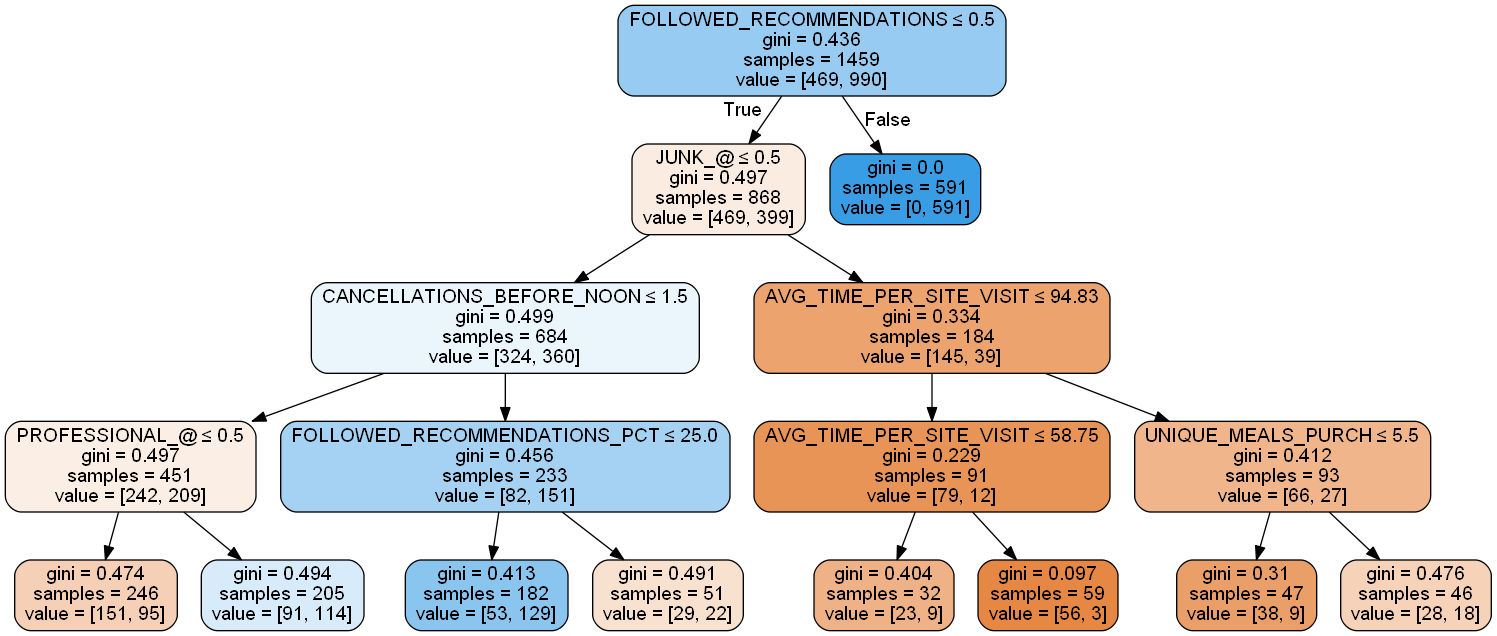

In [92]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = seed)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))

    
# Saving scores
treep_score_train = tree_pruned_fit.score(X_train, y_train).round(4)
treep_score_test = tree_pruned_fit.score(X_test, y_test).round(4)
treep_score_auc= roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4)




print(f'Scores Difference: {round(treep_score_train - treep_score_test, 4)}')

print ('MSE:', mean_squared_error(y_test, tree_pred).round(4))

    
    



# calling display_tree
display_tree(tree       = tree_pruned_fit,
            feature_df = X_train)

In [124]:
print(confusion_matrix(y_true = y_test,
                       y_pred = tree_pred))
print(f"""            True Negative {round(101/487 * 100 ,2)}% ot the test sample
            False Positive {round(55/487 * 100, 2)}% of the test sample
            False Negative {round(65/487 * 100,2)}% of test sample
            True Positive {round(266/487 * 100,2)}% of thest sample""")


[[101  55]
 [ 65 266]]
            True Negative 20.74% ot the test sample
            False Positive 11.29% of the test sample
            False Negative 13.35% of test sample
            True Positive 54.62% of thest sample


### Features Importance

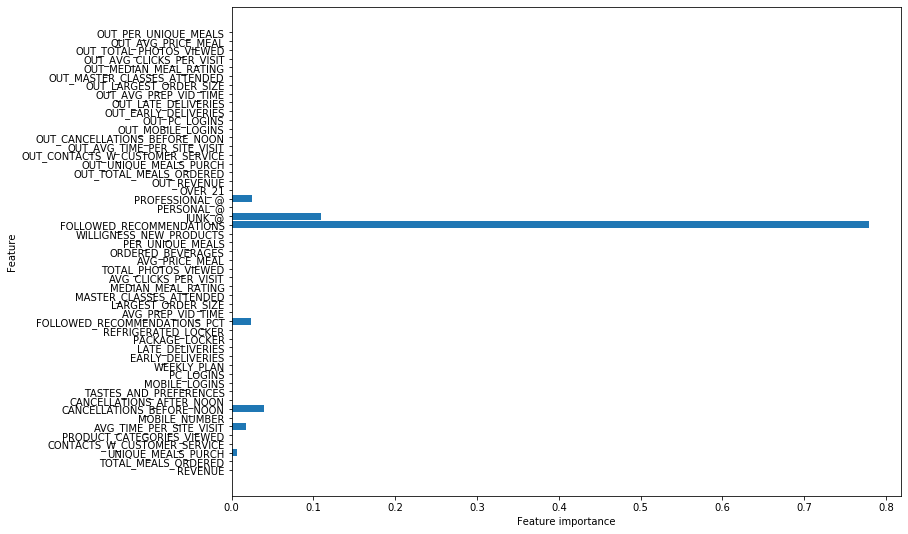

In [125]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

From this pruned tree classification model we can see that followed recommendations is the most important insight to determining cross selling. When a customer follows recommendation 35% or more the time of more they may be more likely to subscribe. Also note that feature importance on this tree are quite similar to those features that emerged from the logistic regression model. Even though this model perform had slightly more true negatives than the logistic regression model it predicted far better and has a higher AUC score. 

# Comparing Models

In [98]:
# creating a dictionary for model results
model_performance = {'Model'    : ['Logit', 'KNN n/Stand Sig/Variables', 'KNN Stand Sig/Variables', 'KNN n/Stand all/Variables', 'KNN Stand all/Variables', 'Full Tree', 'Pruned Tree'],
           
                     'Training' : [lg_train_score , knn_nons_sig_train, 
                                   knn_st_sig_train, knn_nons_all_train,
                                   knn_st_all_train, full_tree_train_score,treep_score_train],  
           
                     'Testing'  : [lg_test_score, knn_nons_sig_test, 
                                   knn_st_sig_test, knn_nons_all_test, 
                                   knn_st_all_test, full_tree_test_score, treep_score_test],
      
                     'AUC'    : [lg_auc, knn_nons_sig_auc, 
                                 knn_st_sig_auc, knn_nons_all_auc, 
                                 knn_st_all_auc, full_tree_roc, treep_score_auc]}



# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)

model_performance.sort_values(by='AUC', ascending=False).round(3)

,Model,Training,Testing,AUC
1,KNN n/Stand Sig/Variables,0.797,0.760,0.750
3,KNN n/Stand all/Variables,0.797,0.760,0.750
6,Pruned Tree,0.794,0.754,0.726
2,KNN Stand Sig/Variables,0.852,0.737,0.708
5,Full Tree,1.000,0.719,0.683
0,Logit,0.746,0.717,0.671
4,KNN Stand all/Variables,0.781,0.721,0.649


# <b> Conclusion 

After building and comparing 7 models the <b>Pruned CART model outperformed </b> the other 6. It does not has the highest <b>AUC</b> (3rd place), meaning that for example the KNN standardized with non significant variables predicted overall better, however as mentioned this model overfitts the data and it will likely not perform well on new observations. What is more this pruned CART model has one of the lowest <b>MSE</b>, meaning that the predicted responses are closer to the true response. In addition, this model outperforms the Logistic Regression model: overall it predicts better and it explains better variations in cross-sell success. 